In [48]:
import pandas as pd
import matplotlib.pyplot as plt

1) Read the CSV file into a pandas dataframe.

In [49]:
df = pd.read_csv('../data/Fremont_Bridge_Bicycle_Counter.csv')
df.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0


2) Add columns to the dataframe containing:  
* The total (East + West) bicycle count  
* The hour of the day  
* The year  

In [50]:
df['total_bicycle_count'] = df['Fremont Bridge East Sidewalk'] + df['Fremont Bridge West Sidewalk']
df['hour'] = pd.DatetimeIndex(df['Date']).hour
df['year'] = pd.DatetimeIndex(df['Date']).year
df.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,total_bicycle_count,hour,year
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0,13.0,0,2012
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0,10.0,1,2012
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0,2.0,2,2012
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0,5.0,3,2012
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0,7.0,4,2012


3) Create a dataframe with the subset of data from the year 2016.

In [51]:
df_2016 = df[df['year'] == 2016]
df_2016.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,total_bicycle_count,hour,year
28440,01/01/2016 12:00:00 AM,18.0,9.0,9.0,18.0,0,2016
28441,01/01/2016 01:00:00 AM,15.0,3.0,12.0,15.0,1,2016
28442,01/01/2016 02:00:00 AM,11.0,6.0,5.0,11.0,2,2016
28443,01/01/2016 03:00:00 AM,7.0,1.0,6.0,7.0,3,2016
28444,01/01/2016 04:00:00 AM,2.0,0.0,2.0,2.0,4,2016


4) Use pandas + matplotlib to plot the counts by hour. (i.e. hour of the day on the x-axis, total daily counts on the y-axis).

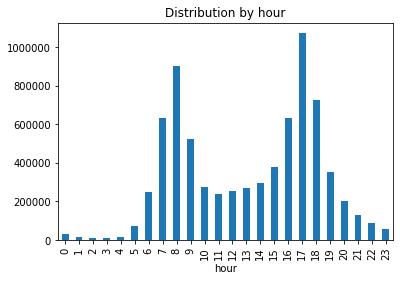

In [52]:
df.groupby(['hour'])['total_bicycle_count'].sum().plot(kind='bar')
plt.title('Distribution by hour')
plt.show()

5) Use pandas to determine what is (on average) the busiest hour of the day.

In [53]:
df_mean = df.groupby('hour')['hour', 'total_bicycle_count'].mean()
df_mean.loc[df_mean['total_bicycle_count'].idxmax()]

hour                    17.000000
total_bicycle_count    392.289003
Name: 17, dtype: float64

The busiest hour is 17 (5 PM), with an average of 392.3 bicycles crossing the Fremont Bridge.